<a href="https://colab.research.google.com/github/bharti0420/data_analysis_work/blob/master/data_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

##Daily Result

In [0]:
import pandas as pd
import numpy as np
from datetime import *
import csv
from matplotlib import pyplot as plt
import matplotlib.pyplot as plot
from google.colab import files

def calulate_daywise(title,id):
  data_downloaded=drive.CreateFile({'id':id})
  data_downloaded.GetContentFile(title)
  #read file to filter negative value
  with open(title,'r') as fin, open('fout.csv','w',newline='') as fout:
    reader=csv.reader(fin,skipinitialspace=True)
    writer=csv.writer(fout,delimiter=',')
    writer.writerow(next(reader))
    
    for i in reader:
      if float(i[-4]) < 500 and  float(i[-4])>=0:
        writer.writerow(i)
      else:
        i[-4]=0  #change invalid value with 0 and further change 0 with empty cell
        writer.writerow(i)

  df_data=pd.read_csv('fout.csv')
  df_data['Raw Conc.'] = df_data['Raw Conc.'].replace(0,np.nan, regex=True)
  df_data['Raw Conc.'] = df_data['Raw Conc.'].fillna('') #insert blank in cell with value 0
  df_data.to_csv('fout.csv')
 
  df_data=pd.read_csv('fout.csv')
  df_data.rename(columns={'Date (LT)': 'date'},inplace=True)
  df_data.head(1)
  string1="day_way"
  file_name=string1+title
  
  df_data['date'] = pd.to_datetime(df_data.date)
  df_data['date'] = df_data['date'].dt.strftime('%Y/%m/%d')
 
  df=df_data.groupby('date')['Raw Conc.'].agg([pd.np.min, pd.np.max, pd.np.mean,pd.np.median, pd.np.std])
  df.to_csv(file_name)
  files.download(file_name)
  
 
  
  

In [0]:
#file_list=drive.ListFile().GetList()
file_list=drive.ListFile({'q': "'1qKpVhD6tEsbztoklFKyNUo1EFVLkj6T0' in parents and trashed=false"}).GetList()
print(len(file_list))
for file1 in file_list:
  st=file1['title']
  st1=file1['id'] 
  calulate_daywise(st,st1)
  

4


## Line Plot of all 4 year based on daily data

In [0]:
uploaded=files.upload()

Saving daily_max_4_year.csv to daily_max_4_year.csv
Saving daily_mean_4_year.csv to daily_mean_4_year.csv
Saving daily_median_4_year.csv to daily_median_4_year.csv
Saving daily_min_4_year.csv to daily_min_4_year.csv
Saving daily_std_4_year.csv to daily_std_4_year.csv


In [0]:
def line_plot_daily(file_name):
  df=pd.read_csv(file_name,parse_dates=['date'])
  
  
  df['date'] = pd.to_datetime(df['date'])
  #myFmt = DateFormatter("%m/%d")
  df = df.set_index('date')  
  colors=['red','blue','black','purple']
  ax=df.plot(y=df.columns,color=colors, marker='.')
  ax.set_title(file_name,fontsize=20,color='blue')
  ax.xaxis.grid(True, which="minor")
  plt.gcf().set_size_inches(15,8)
  #ax.xaxis.set_major_formatter(myFmt); 
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
  plt.setp(ax.get_xticklabels(), rotation=90)
  ax.set_xlabel('Date',fontsize=20,color='black')
  ax.set_ylabel('Raw Cons.',fontsize=20,color='black')
  plt.show()
  print("\n\n")

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


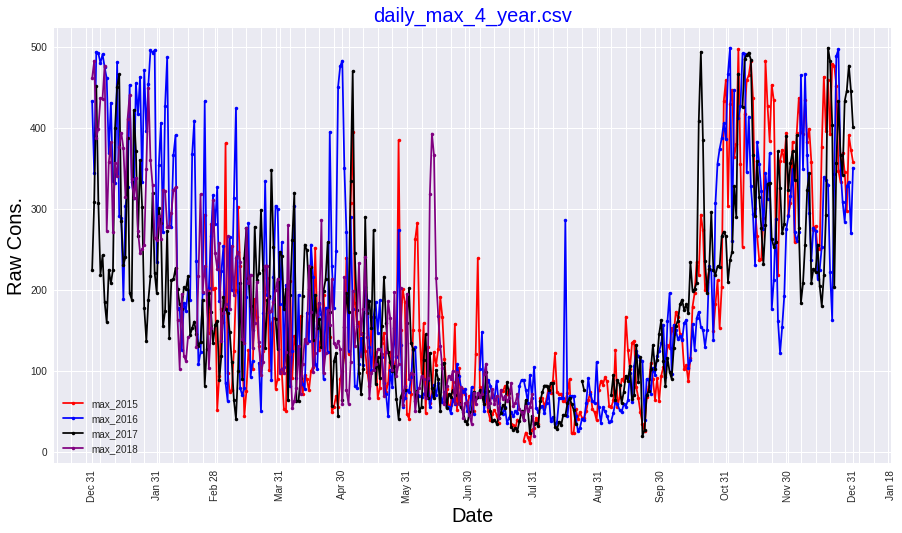

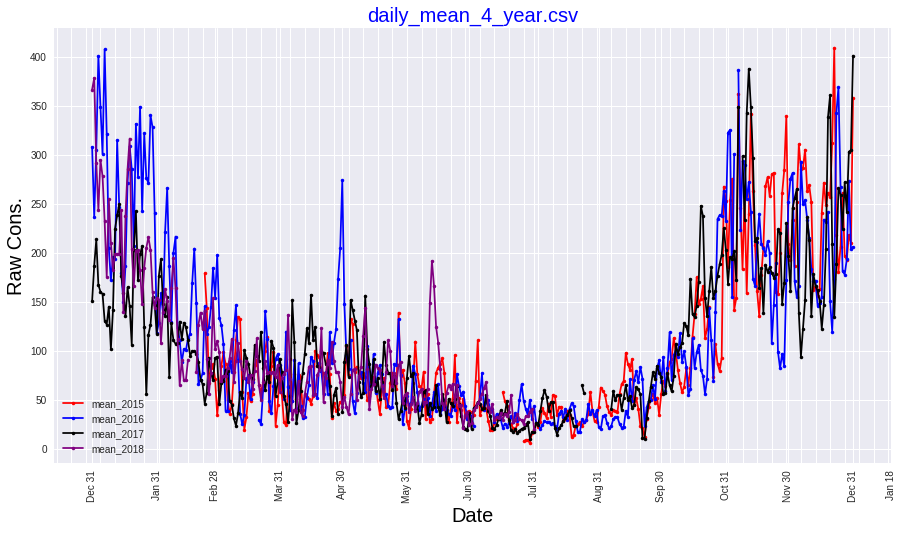

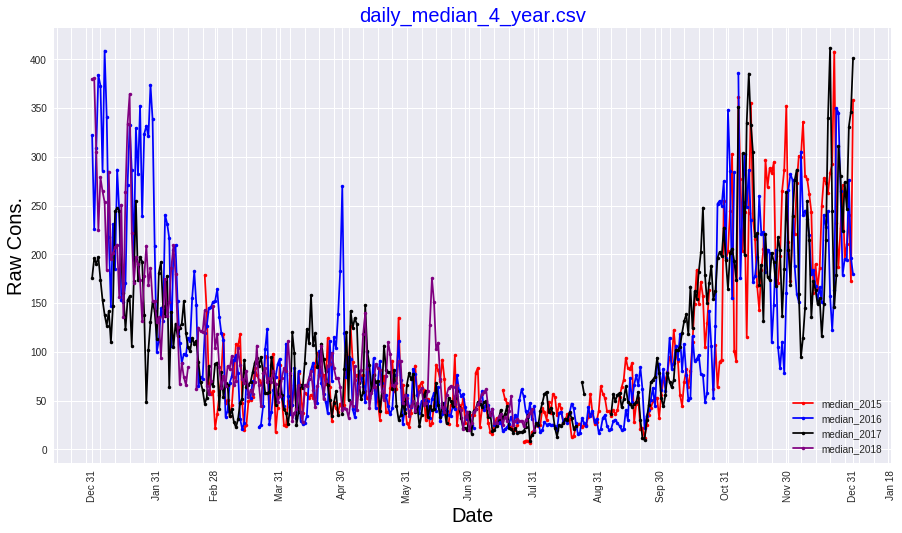

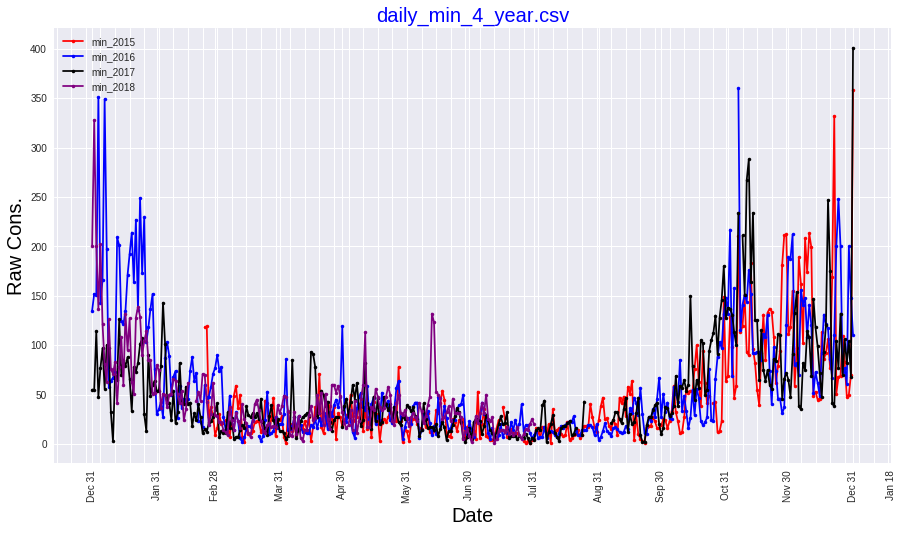

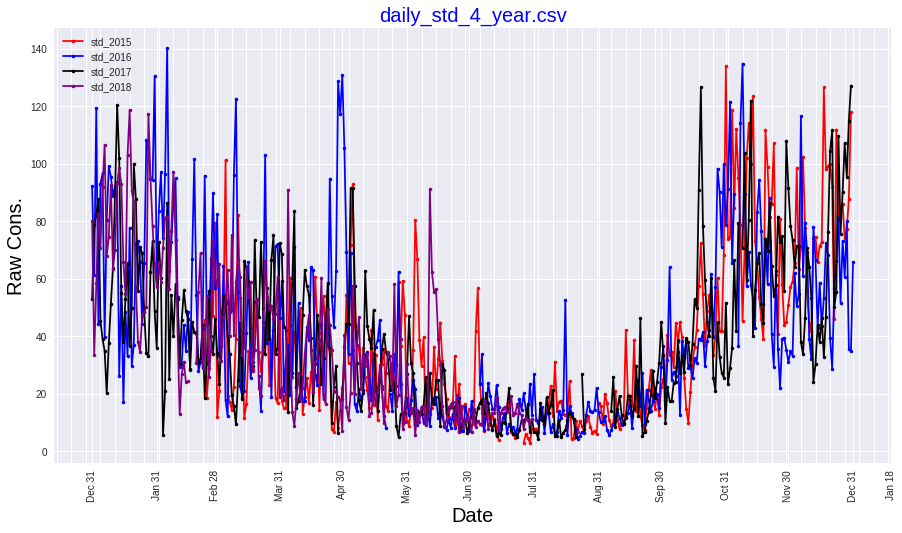

In [0]:
for fn in uploaded.keys():
  line_plot_daily(fn)
  

##Weekly Result

In [0]:
uploaded=files.upload()

Saving day_wayNewDelhi_PM2.5_2015_YTD.csv to day_wayNewDelhi_PM2.5_2015_YTD.csv
Saving day_wayNewDelhi_PM2.5_2016_YTD.csv to day_wayNewDelhi_PM2.5_2016_YTD.csv
Saving day_wayNewDelhi_PM2.5_2017_YTD.csv to day_wayNewDelhi_PM2.5_2017_YTD.csv
Saving day_wayNewDelhi_PM2.5_2018_YTD.csv to day_wayNewDelhi_PM2.5_2018_YTD.csv


In [0]:
def Weekly_avg(file_name):
  df = pd.read_csv(file_name, parse_dates=['date'])
  df['date'] = pd.to_datetime(df['date'])
  #df = df.set_index('date')
  df1 = df.set_index('date').resample('W').mean()
  filename="weekly_"+file_name
  df1.to_csv(filename)
  files.download(filename)

In [0]:
for fn in uploaded.keys():
  Weekly_avg(fn)

###  Line Plot of all 4 year based on weekly data

In [0]:
uploaded=files.upload()

Saving weekly_daily_max_4_year.csv to weekly_daily_max_4_year (1).csv
Saving weekly_daily_mean_4_year.csv to weekly_daily_mean_4_year.csv
Saving weekly_daily_median_4_year.csv to weekly_daily_median_4_year.csv
Saving weekly_daily_min_4_year.csv to weekly_daily_min_4_year.csv
Saving weekly_daily_std_4_year.csv to weekly_daily_std_4_year.csv


In [0]:

def line_plot_weekly(file_name):
  df=pd.read_csv(file_name)
  df['date'] = pd.to_datetime(df['date'])
  
  df = df.set_index('date')  
  colors=['red','blue','black','purple']
  ax=df.plot(y=df.columns,color=colors, marker='.')
  ax.set_title(file_name,fontsize=20,color='blue')
  
  plt.gcf().set_size_inches(15,10)
  
  
  ax.xaxis.grid(True, which="minor")
  
  plt.setp(ax.get_xticklabels(), rotation=90)
  ax.set_xlabel('Date',fontsize=20,color='black')
  ax.set_ylabel('Raw Cons.',fontsize=20,color='black')
  ticklabels=['']
  for items in df.index[::4]:
    ticklabels.append(items.strftime('%b %d'))
  
  ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
  
  
  #print(ticklabels)
  
  plt.show()
  print("\n\n")

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


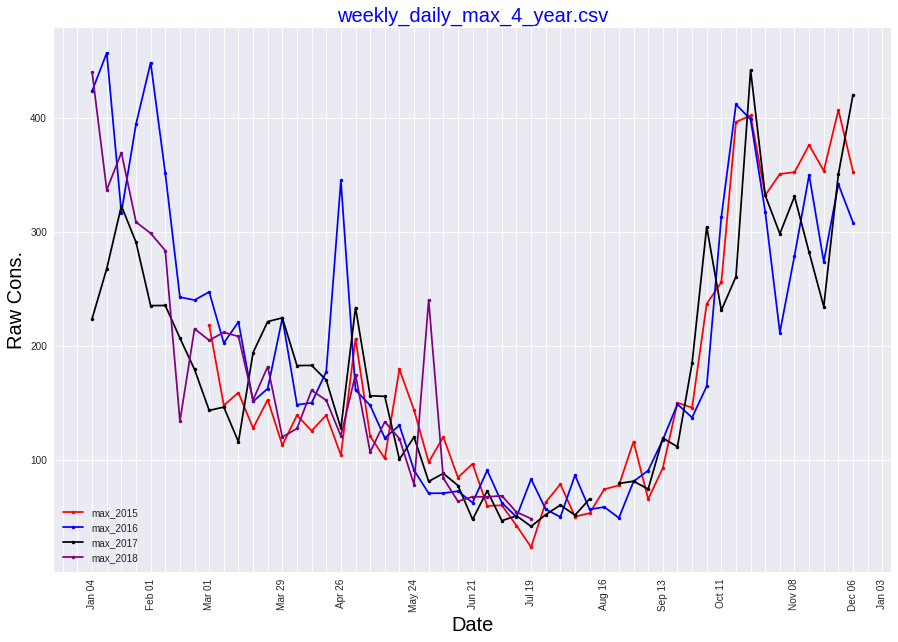

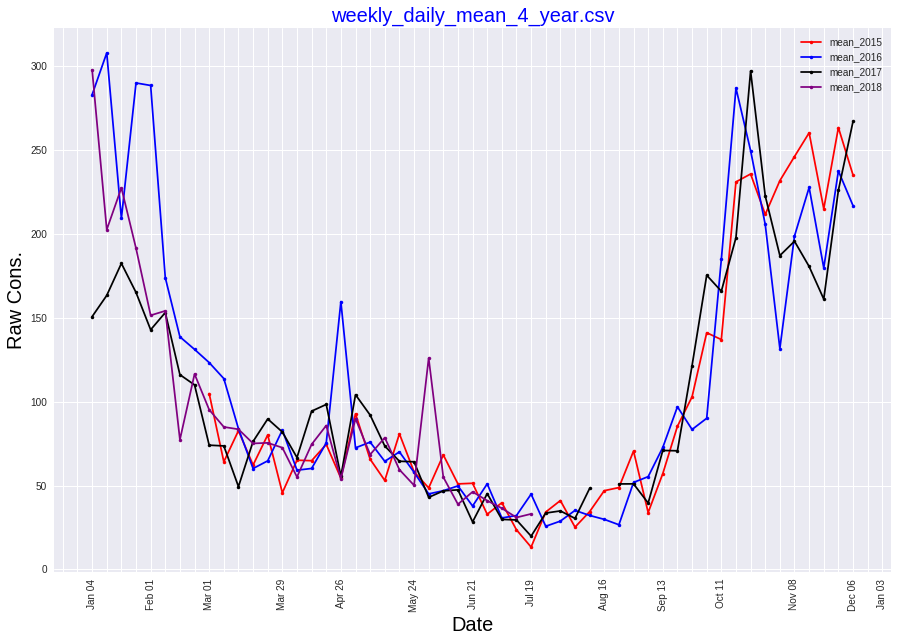

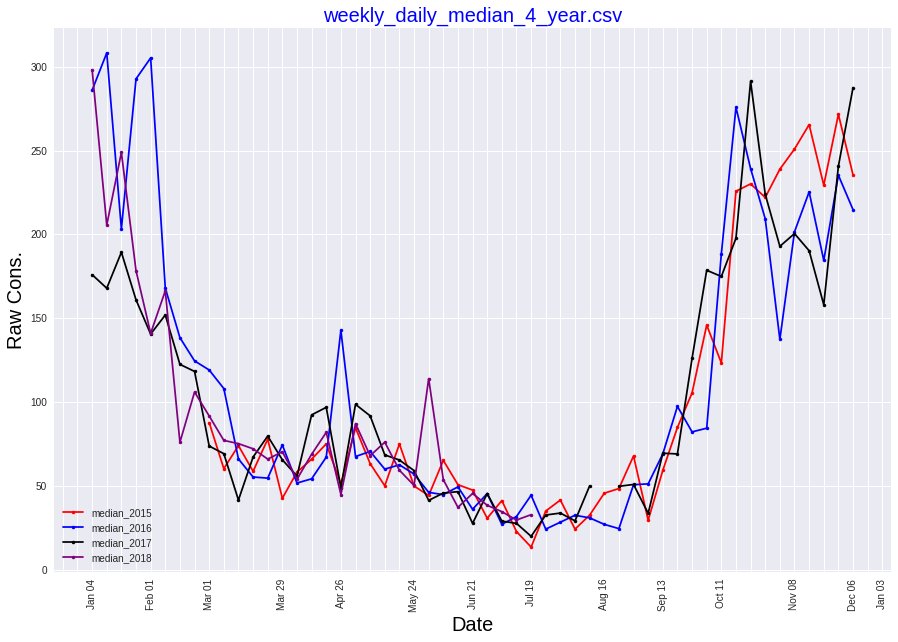

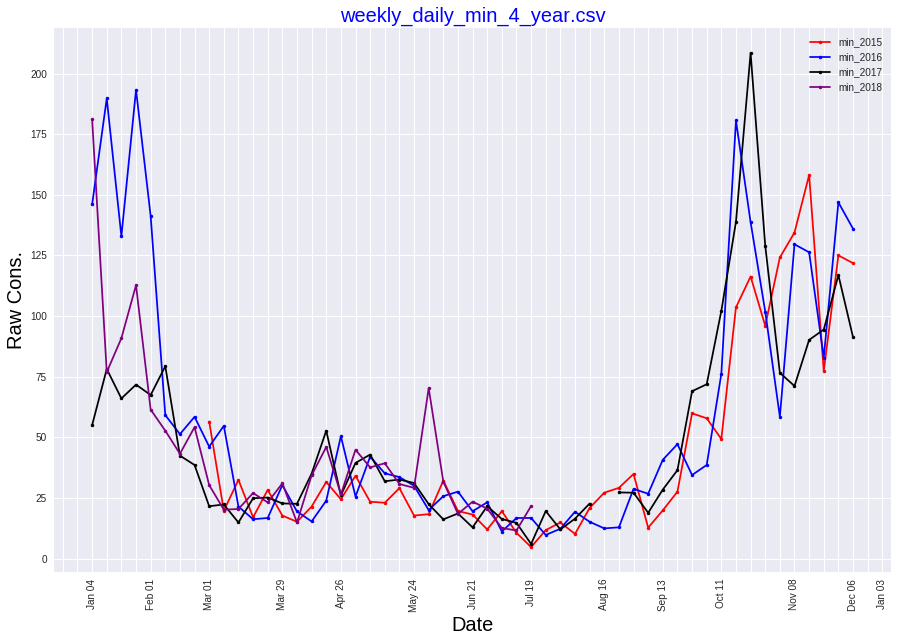

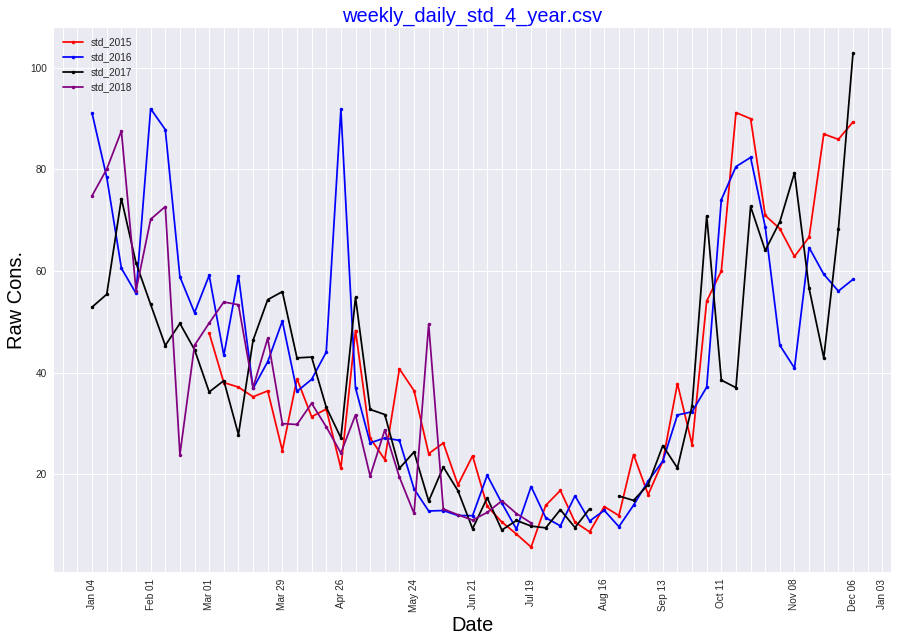

In [0]:
for fn in uploaded.keys():
  line_plot_weekly(fn)

## Monthly Result

In [0]:
uploaded=files.upload()

Saving day_wayNewDelhi_PM2.5_2015_YTD.csv to day_wayNewDelhi_PM2.5_2015_YTD (8).csv
Saving day_wayNewDelhi_PM2.5_2016_YTD.csv to day_wayNewDelhi_PM2.5_2016_YTD (6).csv
Saving day_wayNewDelhi_PM2.5_2017_YTD.csv to day_wayNewDelhi_PM2.5_2017_YTD (6).csv
Saving day_wayNewDelhi_PM2.5_2018_YTD.csv to day_wayNewDelhi_PM2.5_2018_YTD (6).csv


In [0]:
def Monthly_avg(file_name):
  df = pd.read_csv(file_name, parse_dates=['date'])
  df['date'] = pd.to_datetime(df['date'])
  #df = df.set_index('date')
  df1 = df.set_index('date').resample('M').mean()
  filename="monthly_"+file_name
  df1.to_csv(filename)
  files.download(filename)

In [0]:
for fn in uploaded.keys():
  Monthly_avg(fn)

###  Line Plot of all 4 year based on monthly data

In [0]:
uploaded=files.upload()

Saving monthly_daily_max_4_year..csv to monthly_daily_max_4_year. (1).csv
Saving monthly_daily_mean_4_year.csv to monthly_daily_mean_4_year.csv
Saving monthly_daily_median_4_year_.csv to monthly_daily_median_4_year_.csv
Saving monthly_daily_min_4_year_.csv to monthly_daily_min_4_year_.csv
Saving monthly_daily_std_4_year.csv to monthly_daily_std_4_year.csv


In [0]:
def line_plot_monthly(file_name):
  df=pd.read_csv(file_name)
  df['date'] = pd.to_datetime(df['date'])
  #df['date'] = df['date'].dt.strftime('%b %d')
  datetime=df['date']
  
  #print(df['date'])
  
  df = df.set_index('date')  
  colors=['red','blue','black','purple']
  ax=df.plot(y=df.columns,color=colors, marker='.')
  ax.set_title(file_name,fontsize=20,color='blue')
  
  plt.gcf().set_size_inches(15,9)
  
  
  ax.xaxis.grid(True, which="minor")
  
  plt.setp(ax.get_xticklabels(), rotation=90)
  ax.set_xlabel('Date',fontsize=20,color='black')
  ax.set_ylabel('Raw Cons.',fontsize=20,color='black')
  ticklabels=[]
  for items in df.index[::1]:
    ticklabels.append(items.strftime('%b %d'))
  
  ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
  
  plt.show()
  print("\n\n")

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


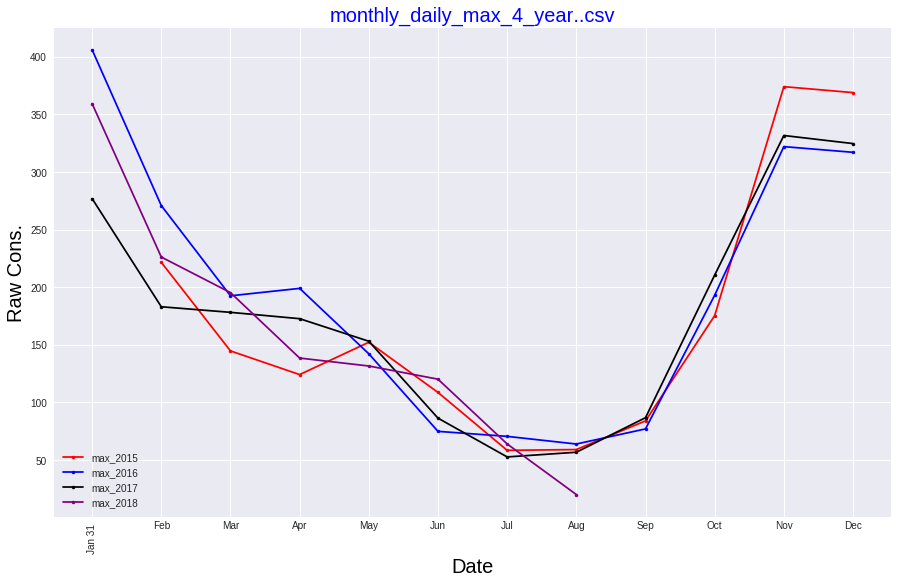

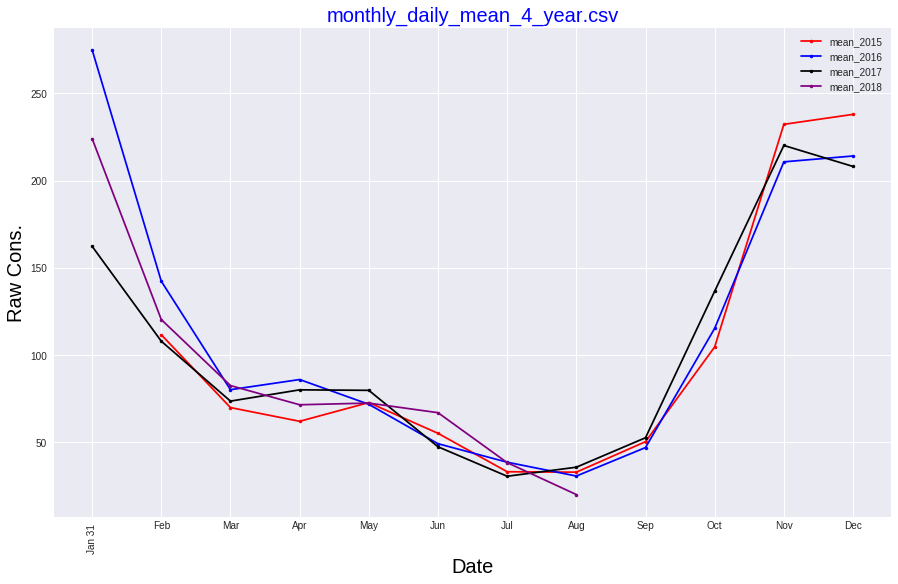

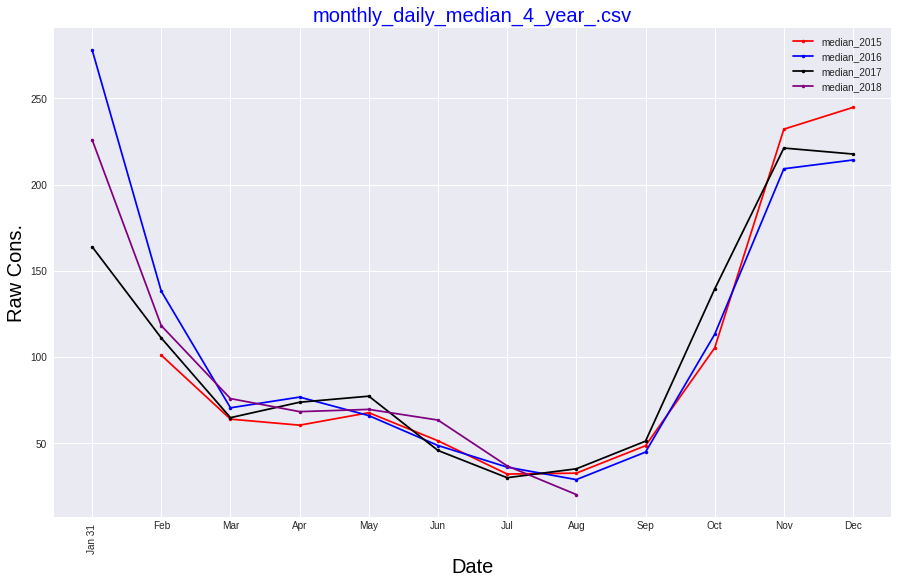

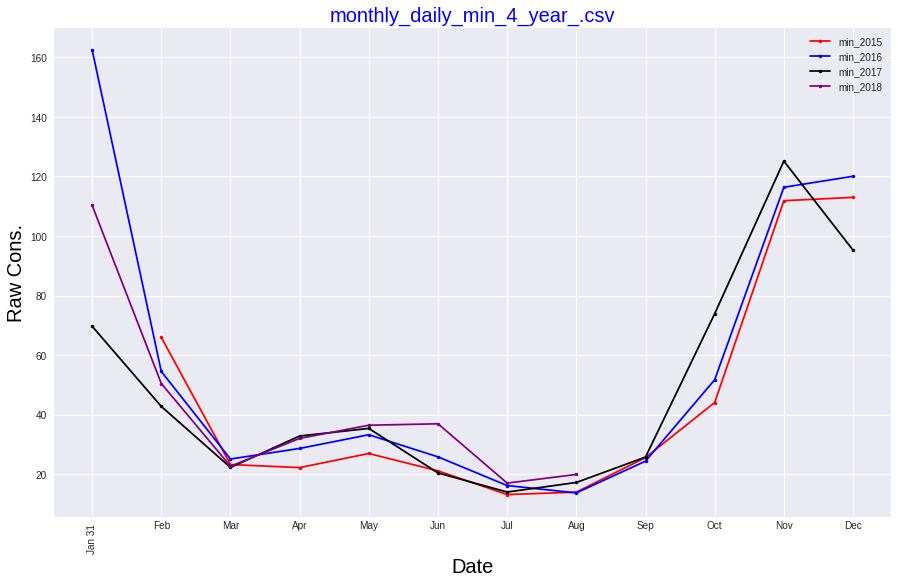

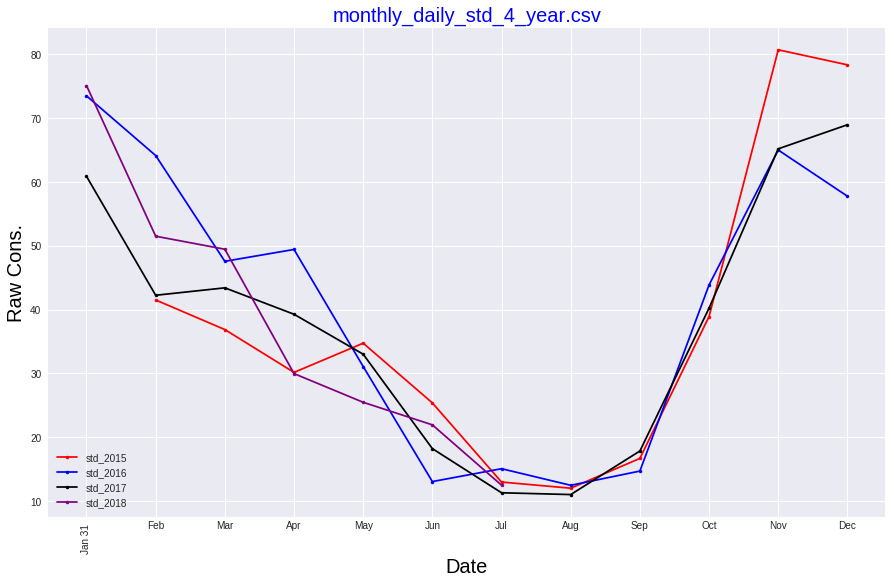

In [0]:
for fn in uploaded.keys():
  line_plot_monthly(fn)